<img src="https://avatars.githubusercontent.com/u/16632335?v=4" alt="Avatar" style="border-radius: 50%; width: 150px; height: 150px;">

# Proejto 002
by Raul Rodrigues

- **Objetivo**

    1. Qual é o perfil dos clientes em relação à inadimplência com base nas variáveis individuais? REsposta no ponto 1.5.0.0.1 e 1.6.5.0.1
    2. Quais variáveis têm correlação linear e alto Information Value (IV) com a inadimplência? Resposta no ponto 1.7.0.0.1
    3. Quais fatores influenciam diretamente a inadimplência, considerando causalidade entre as variáveis? Resposta no ponto 1.7.0.0.1
    4. Quais medidas a fintech deve adotar para minimizar a inadimplência com base nos fatores de risco identificados? Resposta no ponto 1.7.0.0.1


## Importanto a biblioteca e lendo as tabelas

In [1]:
#Importanto biblotecas necessáris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o banco de dados

In [2]:
# Lendo a segunda aba do arquivo Excel e atualizando o DataFrame df
df = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=1)

In [3]:
# Mostrando 5 linhas aleatórias do DataFrame df
df.sample(5)

,Idade,Sexo,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Inadimplencia
140,27,M,Ensino Medio,Propria,Alto,Alto,709,6,0
521,24,H,Graduacao,Propria,Pouco,Pouco,3190,18,1
892,38,M,Pos Graduacao,Propria,Pouco,Pouco,2171,12,0
463,38,M,Graduacao,Propria,Sem investimento,Alto,754,12,0
451,29,H,Graduacao,Propria,Pouco,Sem conta,518,6,0


In [4]:
# Retorna o número de linhas e colunas do DataFrame df
df.shape

(1000, 9)

In [5]:
# Mostra informações sobre o DataFrame df, incluindo tipos de dados e contagens de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Sexo                  1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Inadimplencia         1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Inadimplencia'].value_counts()

0    700
1    300
Name: Inadimplencia, dtype: int64

## Entendendo os dados, utilizando MetaDados

In [7]:
# Lendo a primeira aba (MetaDados) do arquivo Excel e atualizando o DataFrame df_metadados
df_metadados = pd.read_excel('Base_Inadimplencia.xlsx', sheet_name=0)
df_metadados

,Variável,Descrição
0,Idade,Idade do cliente
1,Sexo,H: Homem e M: Mulher
2,Escolaridade,"Medio, Graduação e Pós Graduação;"
3,Tipo_Moradia,"Se mora de favor, paga aluguel ou tem casa pr..."
4,Saldo_Investimento,Se tomador possui alguma conta investimento e...
5,Saldo_Conta_Corrente,Se tomador possui alguma conta corrente em ou...
6,Valor_Emprestimo,valor do empréstimo pessoal solicitado;
7,Duracao_Emprestimo,Duração em meses do empréstimo pessoal solici...
8,Inadimplencia,1 se cliente ficou inadimplente em algum momen...


| Variável              | Descrição                                                                                     |
|-----------------------|------------------------------------------------------------------------------------------------|
| Idade                 | Idade do cliente                                                                               |
| Sexo                  | H: Homem e M: Mulher                                                                           |
| Escolaridade          | Médio, Graduação e Pós Graduação;                                                              |
| Tipo_Moradia          | Se mora de favor, paga aluguel ou tem casa própria;                                            |
| Saldo_Investimento    | Se tomador possui alguma conta investimento em outro banco e qual sua faixa de saldo;          |
| Saldo_Conta_Corrente | Se tomador possui alguma conta corrente em outro banco e qual sua faixa de saldo;              |
| Valor_Emprestimo      | Valor do empréstimo pessoal solicitado;                                                        |
| Duracao_Emprestimo    | Duração em meses do empréstimo pessoal solicitado;                                             |
| Inadimplencia         | 1 se cliente ficou inadimplente em algum momento após o empréstimo ou 0 caso contrário         |


##### **_Insight_**: Planejamento

> Planejamento
- Tipos de variáveis corretos; sem necessidade de transformações (Para facilitar o entendimento Sexo será M: Masculino e F: Feminino)
- Sem valores faltantes.
- Variável alvo: `Inadimplencia` (1=inadimplente, 0=não). Acurácia não é ideal devido ao desbalanceamento (70-30).
- Usaremos Information Value (IV) para avaliar relação com a variável alvo.

## Análise Exploratória

### Iniciar Análise Exploratória/Cleaning/Featuring

In [8]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Sexo'].value_counts()

M    690
H    310
Name: Sexo, dtype: int64

H: Homem e M: Mulher

In [9]:
# Substituir os valores na coluna 'Sexo' usando o método 'map'
# O dicionário {'H': 'M', 'M': 'F'} é usado para mapear os valores antigos para os novos
df['Sexo'] = df['Sexo'].map({'H': 'M', 'M': 'F'})

In [10]:
# Mostra os valores únicos da coluna 'Inadimplencia' e conta cada valor único
df['Sexo'].value_counts()

F    690
M    310
Name: Sexo, dtype: int64

M: Homem (masculino) e F: Mulher (feminino)

In [11]:
# Retorna estatísticas descritivas para o DataFrame df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Valor_Emprestimo,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duracao_Emprestimo,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Inadimplencia,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


>**Insight:**
> - Aparentemente não parece haver outliers

In [12]:
# Selecionando variáveis quantitativas (numéricas)
df_quantitativas = df.select_dtypes(include=['number'])

# Selecionando variáveis qualitativas (categóricas)
df_qualitativas = df.select_dtypes(exclude=['number'])

## Variáveis Quantitativas (numéricas)

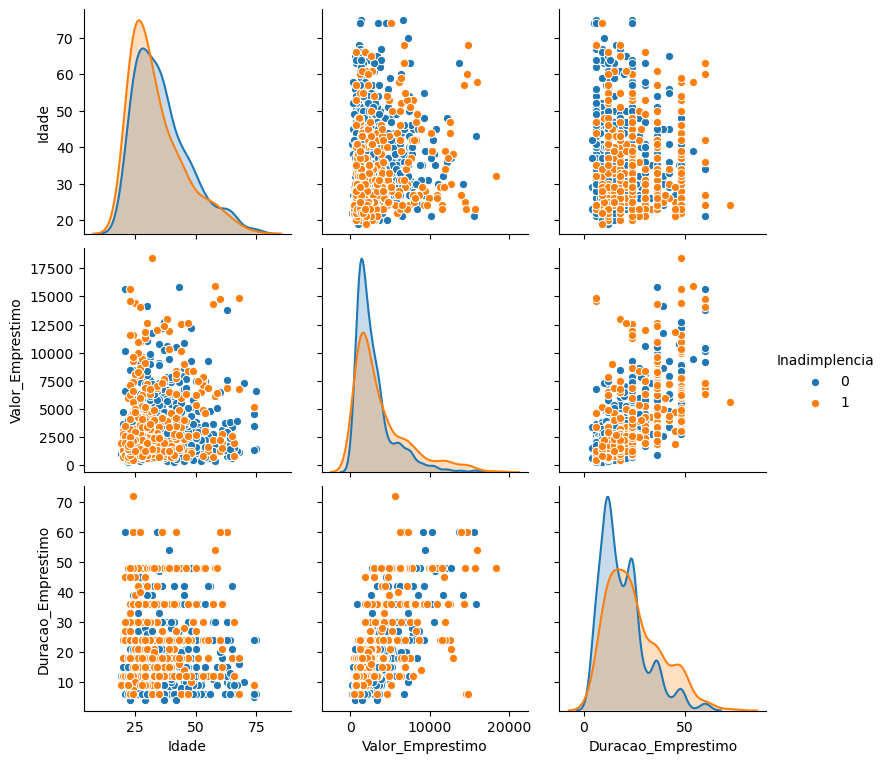

In [13]:
# Criando o pairplot para variáveis numéricas
sns.pairplot(df_quantitativas, hue='Inadimplencia')
plt.show()

##### **_Insigths_**: Variáveis numéricas

> **Variáveis Numéricas**
- **Idade:**  A distribuição de idade parece ser semelhante entre os grupos inadimplentes e não inadimplentes, com uma ligeira tendência a mais inadimplência entre clientes mais jovens.
- **Valor_Emprestimo:** Há uma tendência de maior inadimplência entre clientes com valores de empréstimo mais altos.
- **Duracao_Emprestimo:** Há uma tendência de maior inadimplência entre clientes com duração de emprestimo mais longos.

## Variáveis Qualitativas

### Variável Sexo

In [14]:
# Define a mesma cor azul e laranja usada no pairplot (gráfico acima)
cor_azul = '#1f77b4' # Inadimplencia = 0
cor_laranja = '#ff7f0e' # Inadimplencia = 1

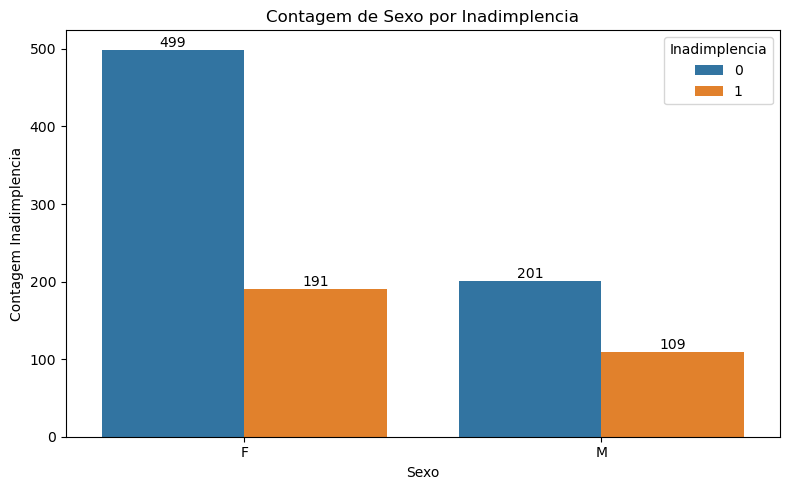

In [15]:
# Loop para criar gráficos de contagem para cada coluna da variável "Sexo"
for col in ['Sexo']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

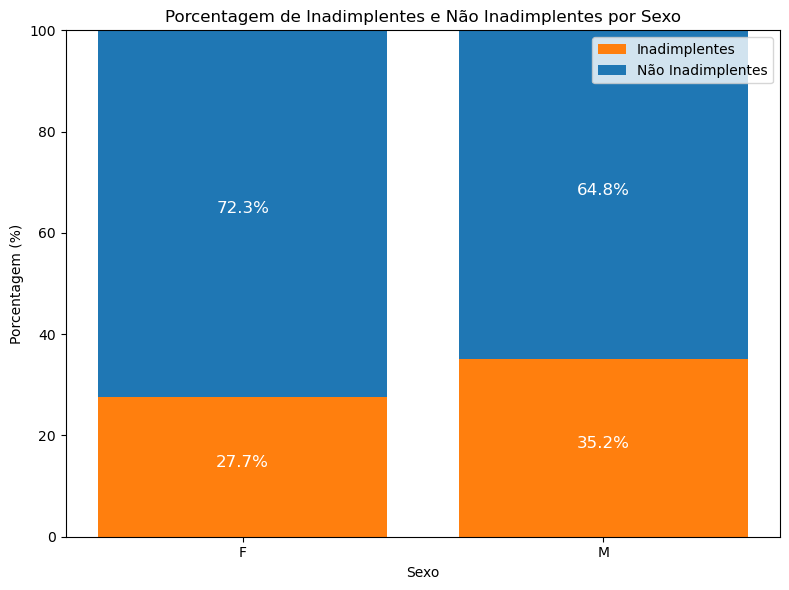

In [16]:
# Criar uma tabela de contingência entre Inadimplencia e Sexo
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Sexo'], margins=True)

# Calcula as porcentagens de inadimplentes para cada sexo
percentual_inadimplentes = (tabela_contingencia.loc[1, ['F', 'M']] / tabela_contingencia.loc['All', ['F', 'M']]) * 100

# Calcula as porcentagens de não inadimplentes para cada sexo
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(8, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (laranja) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Sexo')  # Define o título do gráfico
plt.xlabel('Sexo')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white' if bar1.get_height() > 50 else 'white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white' if bar2.get_height() > 50 else 'white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

### Variável Escolaridade

In [17]:
df['Escolaridade'].unique()

array(['Graduacao', 'Pos Graduacao', 'Ensino Medio'], dtype=object)

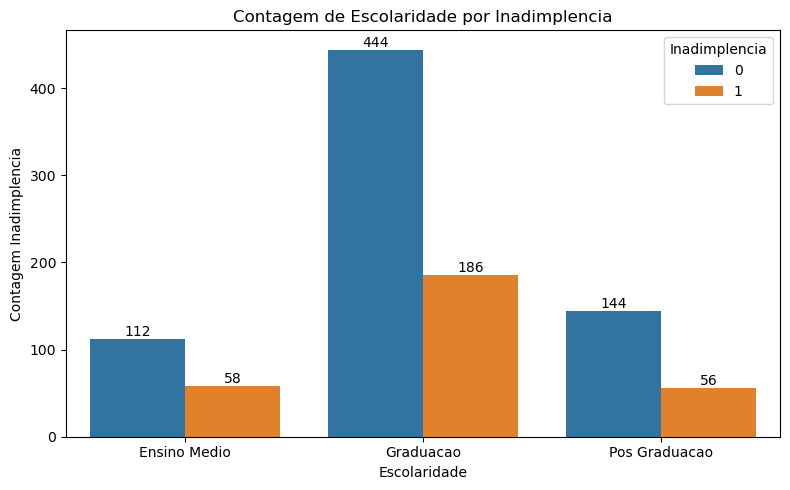

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as cores
cor_azul = '#1f77b4'  # Inadimplencia = 0
cor_laranja = '#ff7f0e'  # Inadimplencia = 1

# Ordem das categorias
ordem_escolaridade = ['Ensino Medio', 'Graduacao', 'Pos Graduacao']

# Loop para criar gráficos de contagem para a variável "Escolaridade"
plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
ax = sns.countplot(data=df, x='Escolaridade', hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja}, order=ordem_escolaridade)  # Cria o gráfico de contagem usando seaborn

plt.title('Contagem de Escolaridade por Inadimplencia')  # Define o título do gráfico
plt.xlabel('Escolaridade')  # Define o rótulo para o eixo x
plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y

# Loop para adicionar contagem acima de cada barra no gráfico
total = len(df['Escolaridade'])  # Calcula o total de observações na coluna "Escolaridade"
for p in ax.patches:  # Itera sobre cada barra no gráfico
    x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
    y = p.get_height()  # Posição y para a anotação (altura da barra)
    ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico

plt.tight_layout()  # Ajusta o layout do gráfico
plt.show()  # Exibe o gráfico criado

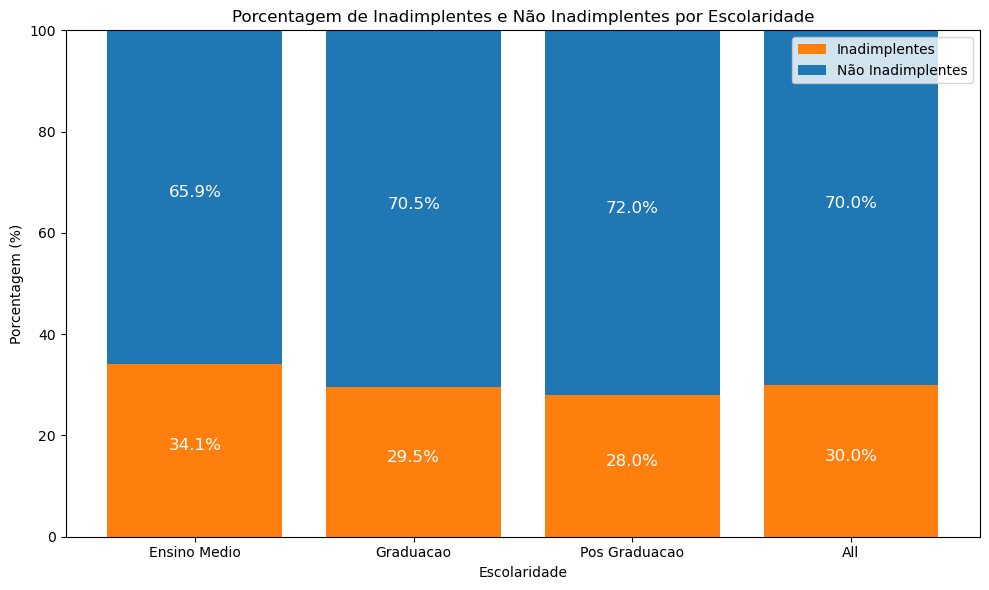

In [19]:
# Criar uma tabela de contingência entre Inadimplencia e Escolaridade
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Escolaridade'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de escolaridade
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de escolaridade
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Escolaridade')  # Define o título do gráfico
plt.xlabel('Escolaridade')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()


### Variável Tipo_Moradia

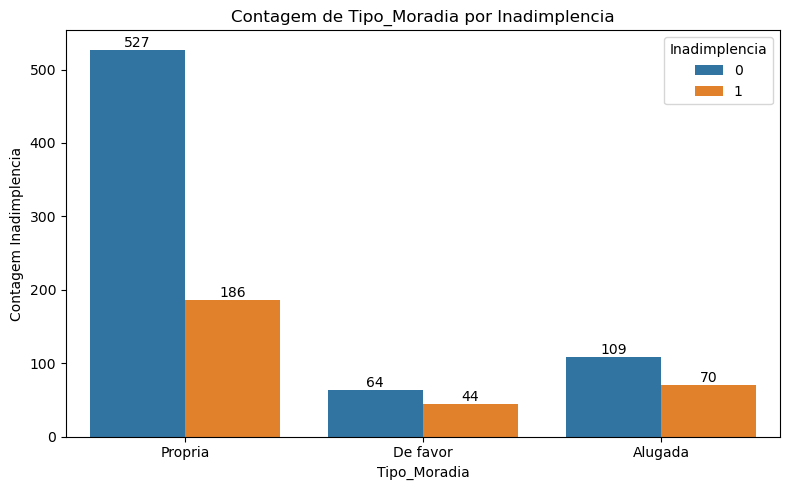

In [20]:
# Loop para criar gráficos de contagem para cada coluna da variável "Tipo_Moradia"
for col in ['Tipo_Moradia']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

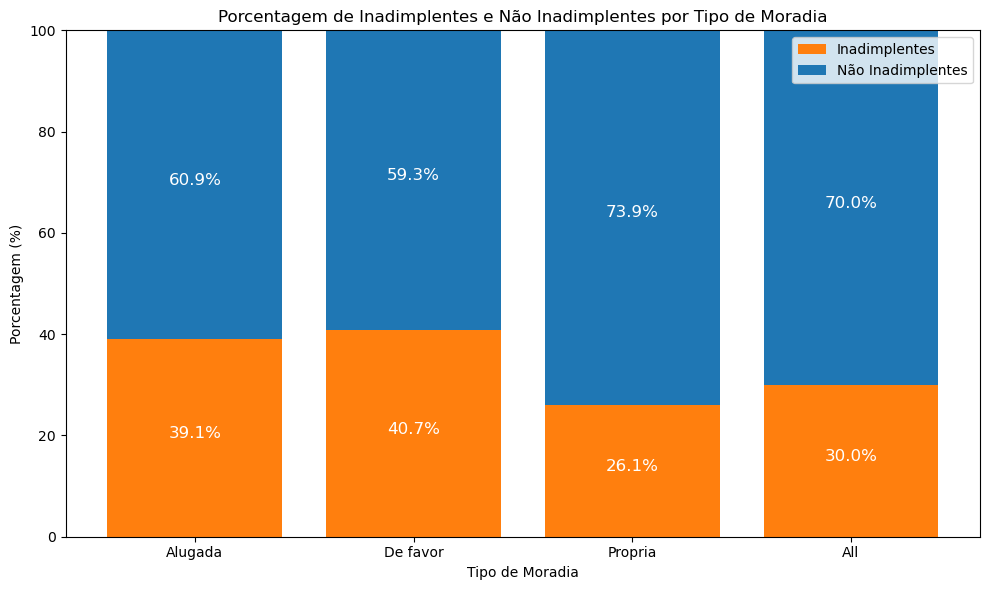

In [21]:
# Criar uma tabela de contingência entre Inadimplencia e Tipo_Moradia
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Tipo_Moradia'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de tipo de moradia
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de tipo de moradia
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Tipo de Moradia')  # Define o título do gráfico
plt.xlabel('Tipo de Moradia')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

### Variável Saldo_Investimento

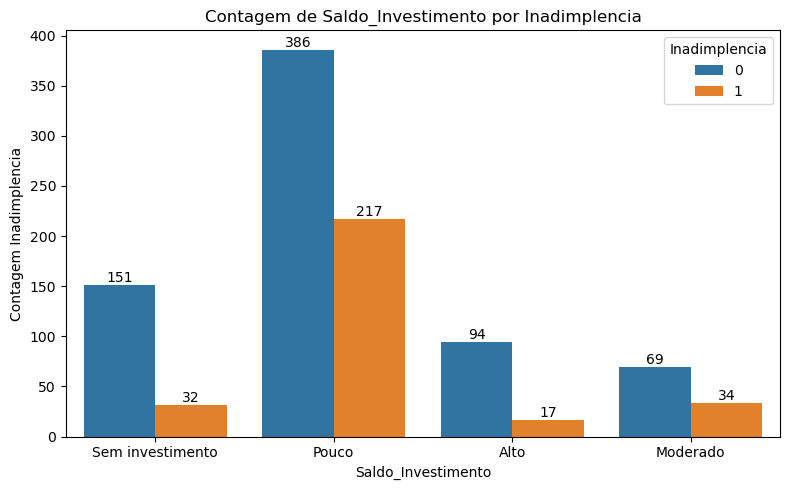

In [22]:
# Loop para criar gráficos de contagem para cada coluna da variável "Saldo_Investimento"
for col in ['Saldo_Investimento']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

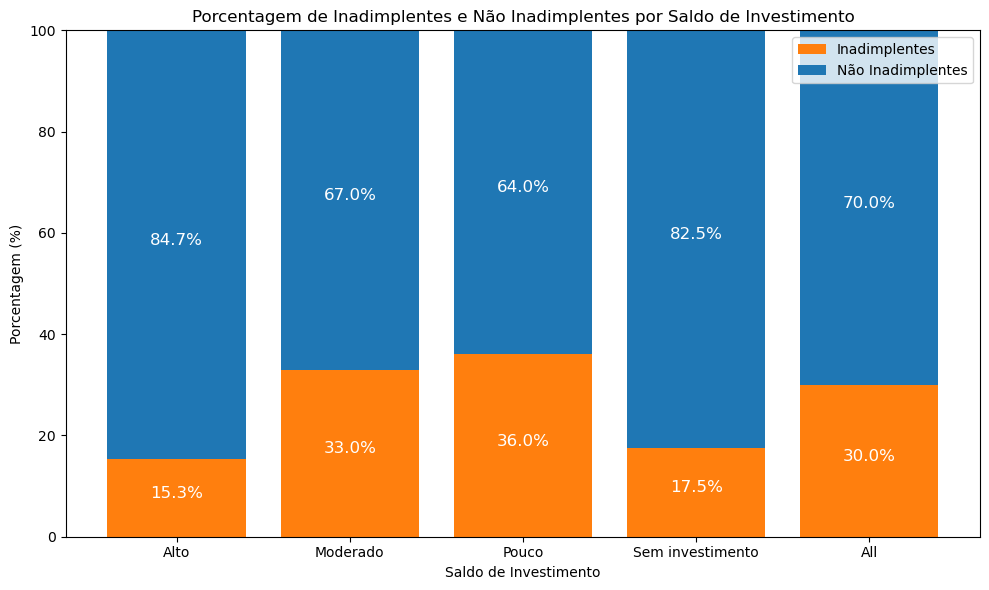

In [23]:
# Criar uma tabela de contingência entre Inadimplencia e Saldo_Investimento
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Saldo_Investimento'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de saldo de investimento
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de saldo de investimento
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Saldo de Investimento')  # Define o título do gráfico
plt.xlabel('Saldo de Investimento')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()


### Variável Saldo_Conta_Corrente

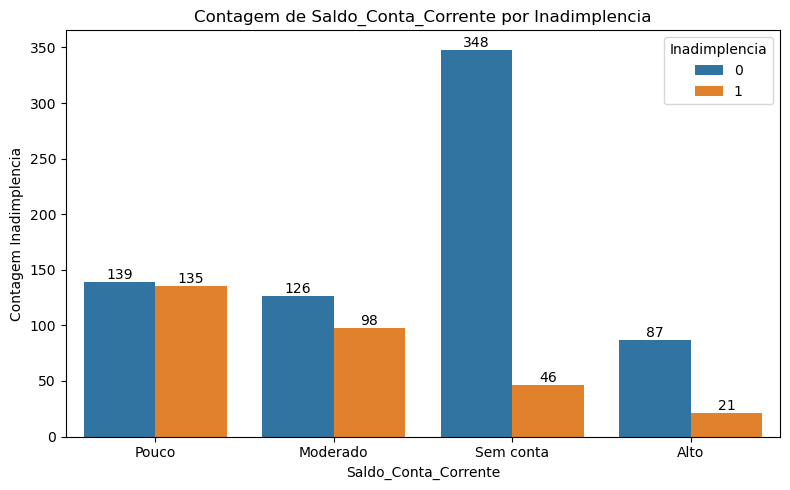

In [24]:
# Loop para criar gráficos de contagem para cada coluna da variável "Saldo_Conta_Corrente"
for col in ['Saldo_Conta_Corrente']:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura para o gráfico
    ax = sns.countplot(data=df, x=col, hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja})  # Cria o gráfico de contagem usando seaborn
    
    plt.title(f'Contagem de {col} por Inadimplencia')  # Define o título do gráfico
    plt.xlabel(col)  # Define o rótulo para o eixo x com o nome da coluna atual
    plt.ylabel('Contagem Inadimplencia')  # Define o rótulo para o eixo y como 'Contagem'
    
    # Loop para adicionar contagem acima de cada barra no gráfico
    total = len(df[col])  # Calcula o total de observações na coluna atual
    for p in ax.patches:  # Itera sobre cada barra no gráfico
        x = p.get_x() + p.get_width() / 2  # Posição x para a anotação (centro da barra)
        y = p.get_height()  # Posição y para a anotação (altura da barra)
        ax.annotate(f'{int(y)}', (x, y), ha='center', va='bottom')  # Adiciona a contagem como anotação no gráfico
    
    plt.tight_layout()  # Ajusta o layout do gráfico
    plt.show()  # Exibe o gráfico criado

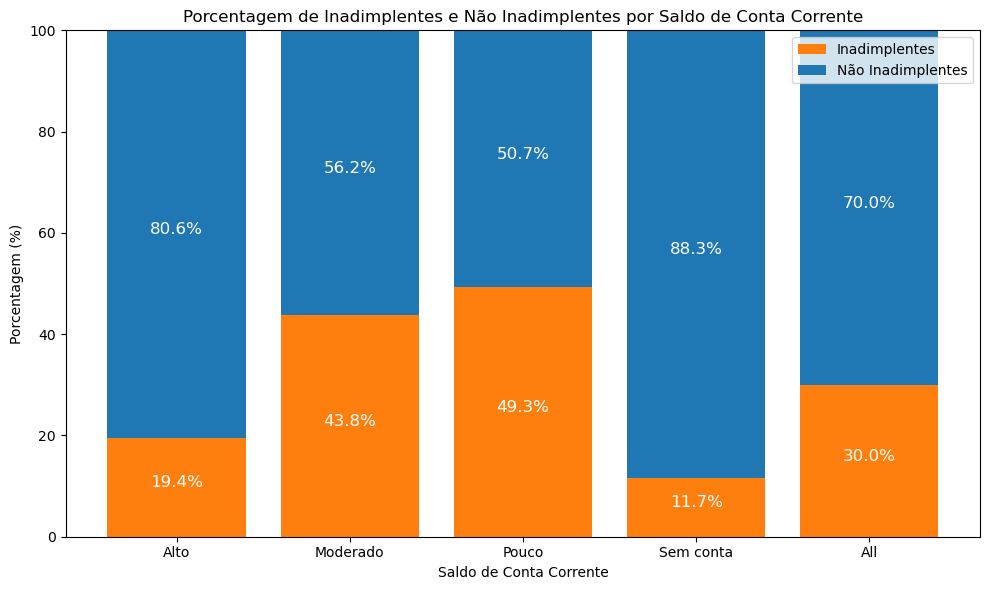

In [25]:
# Criar uma tabela de contingência entre Inadimplencia e Saldo_Conta_Corrente
tabela_contingencia = pd.crosstab(df['Inadimplencia'], df['Saldo_Conta_Corrente'], margins=True)

# Calcula as porcentagens de inadimplentes para cada categoria de saldo de conta corrente
percentual_inadimplentes = (tabela_contingencia.loc[1] / tabela_contingencia.loc['All']) * 100

# Calcula as porcentagens de não inadimplentes para cada categoria de saldo de conta corrente
percentual_nao_inadimplentes = 100 - percentual_inadimplentes

# Cria o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico

# Cria as barras para inadimplentes (vermelho) e não inadimplentes (azul)
bars1 = plt.bar(percentual_inadimplentes.index, percentual_inadimplentes, label='Inadimplentes', color=cor_laranja)
bars2 = plt.bar(percentual_nao_inadimplentes.index, percentual_nao_inadimplentes, bottom=percentual_inadimplentes, label='Não Inadimplentes', color=cor_azul)

plt.title('Porcentagem de Inadimplentes e Não Inadimplentes por Saldo de Conta Corrente')  # Define o título do gráfico
plt.xlabel('Saldo de Conta Corrente')  # Define o rótulo do eixo x
plt.ylabel('Porcentagem (%)')  # Define o rótulo do eixo y
plt.xticks(rotation=0)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.legend(loc='upper right')  # Adiciona a legenda no canto superior direito
plt.ylim(0, 100)  # Define o limite do eixo y

# Adiciona as porcentagens dentro de cada barra
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height()/2, f'{bar1.get_height():.1f}%', ha='center', color='white', fontsize=12)
    plt.text(bar2.get_x() + bar2.get_width()/2, bar1.get_height() + bar2.get_height()/2, f'{bar2.get_height():.1f}%', ha='center', color='white', fontsize=12)

plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições

# Exibe o gráfico
plt.show()

In [26]:
# Imprimir dados do saldo de conta corrente
print("Porcentagem de Inadimplentes por Saldo de Conta Corrente:")
print(percentual_inadimplentes)

print("\nPorcentagem de Não Inadimplentes por Saldo de Conta Corrente:")
print(percentual_nao_inadimplentes)

Porcentagem de Inadimplentes por Saldo de Conta Corrente:
Saldo_Conta_Corrente
Alto         19.444444
Moderado     43.750000
Pouco        49.270073
Sem conta    11.675127
All          30.000000
dtype: float64

Porcentagem de Não Inadimplentes por Saldo de Conta Corrente:
Saldo_Conta_Corrente
Alto         80.555556
Moderado     56.250000
Pouco        50.729927
Sem conta    88.324873
All          70.000000
dtype: float64


##### **_Insight_**: Variáveis Categóricas

> **Variáveis Categóricas:**
- **Sexo:** Enquanto o número total de mulheres inadimplentes é maior, representando 27,7% dos casos, os homens têm uma taxa de inadimplência significativamente maior, com 35,2%. Esta diferença destaca uma correlação entre o sexo e a inadimplência.
- **Escolaridade:** A categoria de "Graduação" apresenta a maior taxa de inadimplência, seguida por "Ensino Médio". Por outro lado, os clientes com "Pós-Graduação" demonstram a menor incidência de inadimplência.
- **Tipo de Moradia:** Clientes que residem em imóveis alugados ou cedidos apresentam taxas de inadimplência mais altas em comparação àqueles que possuem imóveis próprios.
- **Saldo de Investimento:** Embora o grupo com "Pouco Investimento" tenha o maior número absoluto de inadimplentes, quando consideramos por categoria, os indivíduos com "Pouco Investimento" têm a maior taxa de inadimplência, enquanto aqueles com "Alto Investimento" apresentam a menor.
- **Saldo de Conta Corrente:** Surpreendentemente, clientes sem conta corrente representam a maior proporção de não inadimplentes, porém analisando por categorias, os clientes com "Pouco Saldo Corrente" têm a maior porcentagem de inadimplência.

## Information Value

In [27]:
def calculate_iv(data, target, bins=10):
    """Calcula o Valor de Informação (IV) para cada variável independente em relação à variável dependente."""
    
    # DataFrame para armazenar os resultados do IV
    iv_df = pd.DataFrame()
    
    # Loop para calcular o IV de cada variável independente
    for ivar in data.columns.drop(target):
        # Lógica de binning
        if data[ivar].nunique() > 10:
            binned_x = pd.qcut(data[ivar], bins, duplicates='drop')
        else:
            binned_x = data[ivar]
        
        # Cria DataFrame com variável e alvo binados
        d = pd.DataFrame({'Variável': binned_x, 'Alvo': data[target]})
        
        # Agrupa e calcula estatísticas
        d = d.groupby('Variável')['Alvo'].agg(['count', 'sum']).reset_index()
        d.columns = ['Corte', 'N', 'Eventos']
        
        # Calcula WoE e IV
        d['% de Eventos'] = d['Eventos'] / d['Eventos'].sum()
        d['% de Não-Eventos'] = (d['N'] - d['Eventos']) / (d['N'] - d['Eventos']).sum()
        d['WoE'] = np.log(d['% de Eventos'] / d['% de Não-Eventos'])
        d['IV'] = d['WoE'] * (d['% de Eventos'] - d['% de Não-Eventos'])
        
        # Calcula IV total e adiciona ao DataFrame final
        iv = d['IV'].sum()
        iv_df = iv_df.append({'Variável': ivar, 'IV': iv}, ignore_index=True)
    
    # Função para categorizar o poder de separação
    def categorize_separation_power(iv):
        if iv < 0.02:
            return "Muito Fraco"
        elif iv < 0.1:
            return "Fraco"
        elif iv < 0.3:
            return "Médio"
        elif iv < 0.5:
            return "Forte"
        else:
            return "Muito Forte (Verificar!)"
    
    # Adiciona a categoria de poder de separação
    iv_df['Poder de Separação'] = iv_df['IV'].apply(categorize_separation_power)
    
    # Ordena por IV (decrescente)
    iv_df = iv_df.sort_values(by='IV', ascending=False).reset_index(drop=True)
    
    return iv_df

In [28]:
# Example usage (replace 'classif' with your actual target variable)
ranking = calculate_iv(data=df, target='Inadimplencia')
ranking

,IV,Variável,Poder de Separação
0,0.728680,Saldo_Conta_Corrente,Muito Forte (Verificar!)
1,0.246542,Duracao_Emprestimo,Médio
2,0.192473,Saldo_Investimento,Médio
3,0.113637,Valor_Emprestimo,Médio
4,0.100622,Idade,Médio
5,0.083293,Tipo_Moradia,Fraco
6,0.026543,Sexo,Fraco
7,0.008484,Escolaridade,Muito Fraco


##### **_Insight_**: Information Value

> **2. Quais variáveis têm correlação linear e alto Information Value (IV) com a inadimplência?**

O Valor de Informação (IV) é uma métrica que avalia a capacidade preditiva de variáveis em relação à variável alvo. Vamos utilizar as variáveis com maior IV, que indicam uma relação mais forte com 'Inadimplencia', para nossos modelos.

**Variáveis Selecionadas:**
- Saldo_Conta_Corrente (IV: 0.729): (REANALISANDO O GRÁFICO) A análise detalhada revela que clientes com 'Pouco' saldo em conta corrente apresentam uma inadimplência de 49.3%, enquanto aqueles com 'Alto' saldo mostram uma taxa de 19.4%. Considerando que a inadimplência geral é de 30%, fica evidente a significativa influência dessa categoria na inadimplência. O Valor de Informação (IV) confirma e reforça as conclusões da análise exploratória inicial, destacando a importância dessa variável para nossos modelos preditivos.
- Duracao_Emprestimo (IV: 0.247)
- Saldo_Investimento (IV: 0.192)
- Valor_Emprestimo (IV: 0.114)
- Idade (IV: 0.101)

> **3. Quais fatores influenciam diretamente a inadimplência, considerando causalidade entre as variáveis?**

Vide Ranking Information Value

##### **_Insight_**: Saldo de Conta Corrente

> **4. Quais medidas a fintech deve adotar para minimizar a inadimplência com base nos fatores de risco identificados?**

1. Medidas para Minimizar a Inadimplência com Base no Saldo da Conta Corrente

- **Segmentação de Clientes:** Dividir os clientes em grupos com base em seus saldos na conta corrente e direcionar estratégias de gerenciamento de risco específicas para cada segmento. Por exemplo, clientes com saldos mais baixos podem receber limites de crédito mais restritos ou serem submetidos a verificações de crédito mais rigorosas.
   
- **Ofertas Personalizadas:** Oferecer produtos ou serviços personalizados para clientes com saldos mais baixos na conta corrente, como opções de crédito com taxas de juros mais baixas ou planos de pagamento flexíveis, para incentivá-los a manter seus pagamentos em dia.

- **Alertas de Saldo Baixo:** Implementar um sistema de alerta automático para clientes com saldo baixo na conta corrente, informando-os sobre sua situação financeira e sugerindo ações preventivas, como transferências de fundos ou ajustes no orçamento.

- **Programas de Incentivo:** Criar programas de incentivo que recompensem os clientes por manterem saldos mais altos em suas contas correntes, como cashbacks, descontos ou benefícios exclusivos, para motivá-los a melhorar sua saúde financeira.

- **Educação Financeira:** Desenvolver materiais educativos específicos sobre a importância de manter um saldo saudável na conta corrente e como isso pode influenciar sua capacidade de acessar crédito e evitar a inadimplência.

- **Análise Proativa:** Realizar análises proativas dos clientes com saldos baixos na conta corrente para identificar sinais de potencial inadimplência e intervir rapidamente com soluções personalizadas, como renegociação de dívidas ou opções de pagamento alternativas.

## Explorar mais a Variável Duração_Empréstimo

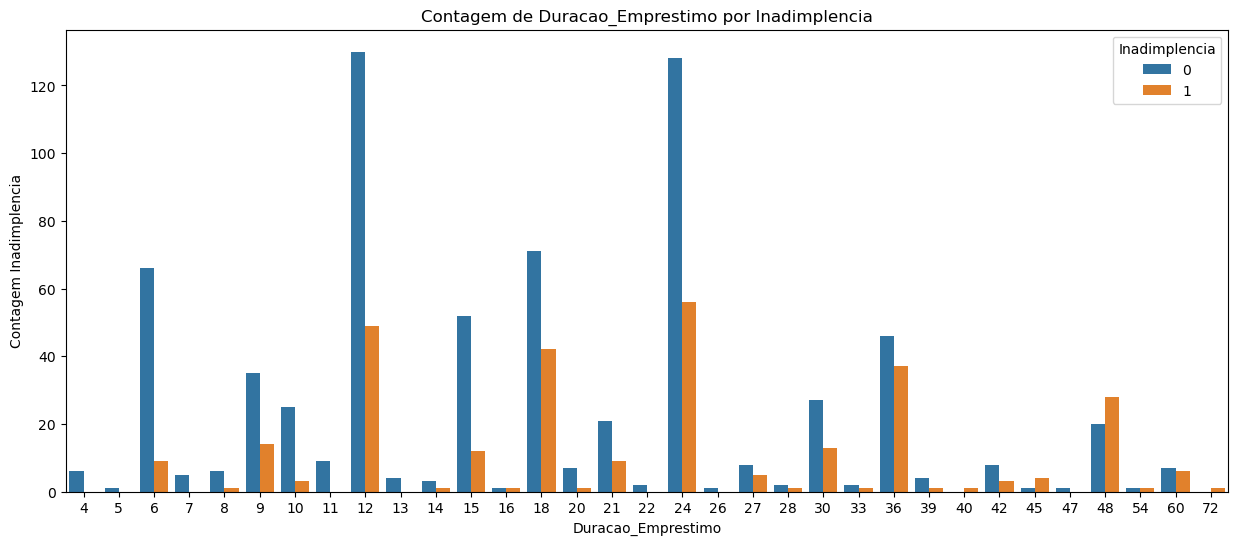

In [29]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 6))

# Ordena os valores únicos de 'Duracao_Emprestimo'
order = sorted(df['Duracao_Emprestimo'].unique())

# Cria um gráfico de contagem para Duracao_Emprestimo com distinção por Inadimplencia
ax = sns.countplot(data=df, x='Duracao_Emprestimo', hue='Inadimplencia', palette={0: cor_azul, 1: cor_laranja}, order=order)

# Define o título e os rótulos dos eixos
plt.title('Contagem de Duracao_Emprestimo por Inadimplencia')
plt.xlabel('Duracao_Emprestimo')
plt.ylabel('Contagem Inadimplencia')

# Exibe o gráfico
plt.show()

In [30]:
# Criação da Tabela de Contingência entre Inadimplência e Duração do Empréstimo
tabela_contingencia_duracao = pd.crosstab(df['Inadimplencia'], df['Duracao_Emprestimo'], margins=True)

# Cálculo da Porcentagem de Inadimplentes por Categoria de Duração do Empréstimo
percentual_inadimplentes_duracao = (tabela_contingencia_duracao.loc[1] / tabela_contingencia_duracao.loc['All']) * 100

# Cálculo da Porcentagem de Não Inadimplentes por Categoria de Duração do Empréstimo
percentual_nao_inadimplentes_duracao = 100 - percentual_inadimplentes_duracao

# Criar DataFrame consolidado
df_percentual_duracao = pd.DataFrame({
    'Inadimplentes (%)': percentual_inadimplentes_duracao,
    'Não Inadimplentes (%)': percentual_nao_inadimplentes_duracao
}).sort_values(by='Inadimplentes (%)', ascending=False)

# Impressão da Tabela Consolidada
print("### Análise de Inadimplência e Não Inadimplência por Duração de Empréstimo ###\n")
print(df_percentual_duracao)

### Análise de Inadimplência e Não Inadimplência por Duração de Empréstimo ###

                    Inadimplentes (%)  Não Inadimplentes (%)
Duracao_Emprestimo                                          
72                         100.000000               0.000000
40                         100.000000               0.000000
45                          80.000000              20.000000
48                          58.333333              41.666667
54                          50.000000              50.000000
16                          50.000000              50.000000
60                          46.153846              53.846154
36                          44.578313              55.421687
27                          38.461538              61.538462
18                          37.168142              62.831858
33                          33.333333              66.666667
28                          33.333333              66.666667
30                          32.500000              67.500000
24   

##### **_Insight_**: Duração de Empréstimo

2. Medidas para Minimizar a Inadimplência com Base na **Duração de Empréstimo** ###

- **Revisão de Política de Empréstimo de Longo Prazo:** 
  - Reduzir ou limitar a oferta de empréstimos com durações de 72, 40 e 45 meses, pois apresentam 100% de inadimplência.
  - Uma forma mais fácil de abordagem é reduzir ou limitar empréstimos acima de 40 meses, ou aumentar a taxa de juros de forma gradativa
  
- **Incentivos para Empréstimos de Curto Prazo:**
  - Empréstimos com duração de 6 a 20 meses apresentam menor inadimplência, variando de 12% a 28.57%. A fintech poderia oferecer incentivos, como taxas de juros mais baixas ou condições de pagamento flexíveis, para promover empréstimos de curto prazo.

- **Educação Financeira para Clientes de Alto Risco:**
  - Começar a fornecer materiais educativos e workshops para clientes que optam por empréstimos de longo prazo, ajudando-os a entender os riscos associados e a gerenciar suas finanças de forma responsável.
  - Posteriormente expandindo para todos que adquiriem algum empréstimo, independentemente da duração de prazo